Installing dependencies

In [1]:
import tensorflow as tf
print(tf.__version__)
import matplotlib as plt
import numpy as np
import pandas as pd


2.17.0


In [4]:
dataset = pd.read_csv(r"C:\Users\delve\Downloads\Churn_Modelling\Churn_Modelling.csv")

In [5]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Dividing the dataset into independent and dependent features

In [6]:
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [9]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [14]:
X.columns.get_loc("Gender")


2

In [16]:
Geography = pd.get_dummies(X.iloc[:,1], drop_first= True)
Gender = pd.get_dummies(X.iloc[:,2],drop_first= True)


,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


# Concatenating into the main dataset

In [22]:
X = X.drop(["Geography","Gender"],axis =1)

KeyError: "['Geography', 'Gender'] not found in axis"

In [23]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [25]:
X = pd.concat([X,Geography,Gender], axis = 1)

In [26]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


# Splitting into train test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [30]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [31]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [32]:
X_train.shape

(8000, 11)

In [33]:
X_test.shape

(2000, 11)

# Creating the ANN

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [35]:
# ANN initialization
Classifier = Sequential()

In [36]:
# Adding the input layer
# 11 BECAUSE WE HAVE 11 FEATURES

Classifier.add(Dense(units=11,activation='relu'))

In [38]:
# adding the first hidden layer

Classifier.add(Dense(units=7,activation='relu'))

In [39]:
# adding the 2nd hidden layer

Classifier.add(Dense(units=6,activation='relu'))

In [40]:
# adding the output layer

Classifier.add(Dense(1,activation="sigmoid"))

In [41]:
Classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [45]:
# Early stopping

import tensorflow as tf
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

<IPython.core.display.Javascript object>

In [46]:
model_history = Classifier.fit(X_train,Y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8757 - loss: 0.2890 - val_accuracy: 0.8485 - val_loss: 0.3770
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8675 - loss: 0.2986 - val_accuracy: 0.8417 - val_loss: 0.3808
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8680 - loss: 0.3000 - val_accuracy: 0.8466 - val_loss: 0.3794
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8737 - loss: 0.2943 - val_accuracy: 0.8493 - val_loss: 0.3774
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8705 - loss: 0.2985 - val_accuracy: 0.8493 - val_loss: 0.3776
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8683 - loss: 0.2999 - val_accuracy: 0.8489 - val_loss: 0.3783
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8731 - loss: 0.2941 - val_accuracy: 0.8466 - val_loss: 0.3816
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8697 - loss: 0.3044 - 

In [50]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

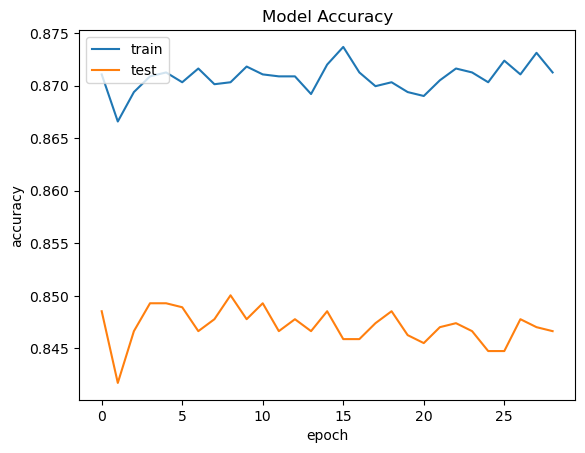

In [65]:
# Summarize the accuracy history
import matplotlib.pyplot as plt

plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc = "upper left")
plt.show()



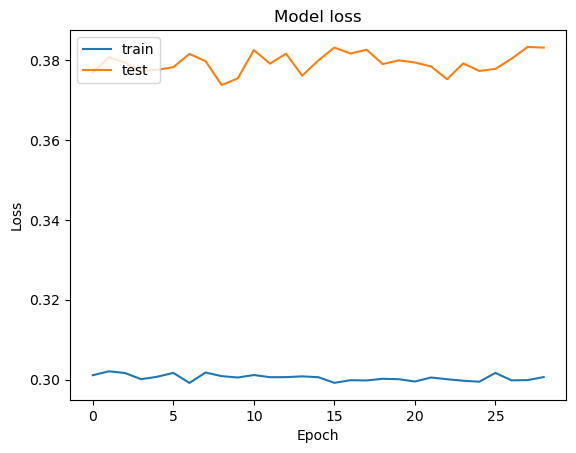

In [68]:
# Summarize the loss history
import matplotlib.pyplot as plt

plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train","test"],loc = "upper left")
plt.show()



# Prediction for test data 

In [70]:
Y_pred = Classifier.predict(X_test)
Y_pred = (Y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Now making the confusion matrix

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[1519,   76],
       [ 203,  202]], dtype=int64)

# Calculating accuracy

In [73]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_pred, Y_test)

In [74]:
score

0.8605

In [76]:
# Getting the weights

Classifier.get_weights()

[array([[-0.49015766,  0.01466654,  0.22066359,  0.1225852 ,  0.29959178,
         -0.5435637 , -0.1458444 ,  0.3511148 , -0.01203996, -0.1256568 ,
         -0.07532851],
        [ 0.20911585,  0.02445377,  1.0954939 ,  0.091151  , -0.2674323 ,
         -0.42768   ,  1.0866933 , -0.86526614, -0.37932187,  0.23046306,
         -1.0097679 ],
        [-0.1872085 ,  0.19335054,  0.05442703, -0.48270363, -0.6182383 ,
          0.3701561 , -0.24655917,  0.07871982, -0.03954365,  0.17155848,
         -0.00822197],
        [ 0.6751884 , -0.9371639 , -0.2943728 ,  0.80614233, -0.24995224,
         -1.0143886 ,  0.16697507, -0.7106853 , -1.1349865 , -0.06883305,
          0.07631709],
        [ 0.991838  , -1.3427547 , -0.1658457 ,  0.8147957 ,  0.31125522,
         -0.03320313, -1.1068264 , -0.3787843 , -0.42256975,  1.5662776 ,
         -0.03681236],
        [-0.25569516, -0.27008924, -0.18691543, -0.29177642,  0.34132403,
         -0.5317091 ,  0.059014  , -0.5453545 ,  0.00373691, -0.1415769